<a href="https://colab.research.google.com/github/sciencebyAJ/oet_gf_ti/blob/main/LocationMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 197 kB of archives.
After this operation, 504 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0 [197 kB]
Fetched 197 kB in 2s (109 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.1.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.1.1-1~jammy0) ...
Setting up proj-bin (9.1.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
!pip install geopandas

In [7]:
!pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 93.9 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/sciencebyAJ/oet_gf_ti.git

Cloning into 'oet_gf_ti'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 98 (delta 29), reused 11 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 17.81 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# rel_path = '/content/drive/MyDrive/Colab Notebooks/Purdy_et_al_2023_ecostress_col2/'
# lib_path = rel_path+'src'

import sys
# sys.path.insert(0,lib_path)
# import plot_funcs
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx
import matplotlib.pyplot as plt

In [9]:
sites_df=pd.read_excel('/content/oet_gf_ti/data/station_metadata.xlsx',skiprows=1)
sites_df.rename(columns={'Site ID':'sitename'},inplace=True)
sites = sites_df.sitename
print('Total potential sites:\t'+str(len(sites)))
sites_gdf = gpd.GeoDataFrame(sites_df, geometry=gpd.points_from_xy(sites_df.Longitude, sites_df.Latitude), crs="EPSG:4326")
sites_gdfss=sites_gdf.loc[sites_gdf.sitename.isin(['US-Ro4','US-Ne1','US-ARM'])]

Total potential sites:	161


In [ ]:
cx.providers.keys()
cx.providers.OpenStreetMap.keys()



dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

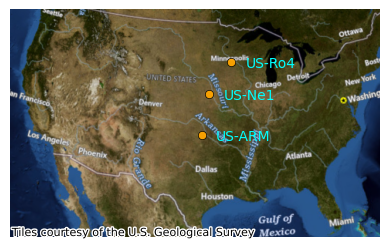

In [34]:
plt.style.use('ggplot')
sites_gdf=sites_gdf.to_crs("ESRI:102003")
sites_gdfss = sites_gdfss.to_crs("ESRI:102003")

ax1 = sites_gdf.plot(figsize=(4, 3), alpha=0.0, edgecolor="k",color='orange')
sites_gdfss.plot(ax=ax1, alpha=0.95, edgecolor="k",color='orange')

for x, y, label in zip(sites_gdfss.geometry.x, sites_gdfss.geometry.y, sites_gdfss.sitename):
    ax1.annotate(label, xy=(x, y), xytext=(10,-4), textcoords="offset points", color='cyan')

cx.add_basemap(ax1,  source=cx.providers.USGS.USImageryTopo,crs=sites_gdfss.crs)
# cx.add_basemap(ax1,  source=cx.providers.OpenStreetMap.HOT,crs=sites_gdfss.crs)

ax1.axis('off')
ax1.margins(0)
plt.tight_layout()
plt.savefig('oet_gf_ti/results/figures/study_area_map.png',dpi=300)


In [30]:
pwd

'/content'